# PROBLEM STATEMENT

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

#  Bank Marketing - EDA and Decision Tree Classifier

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load and Inspect the Dataset

In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Cleaning and Preprocessing

In [ ]:
# Replace 'unknown' with NaN
df.replace('unknown', np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## Exploratory Data Analysis (EDA)

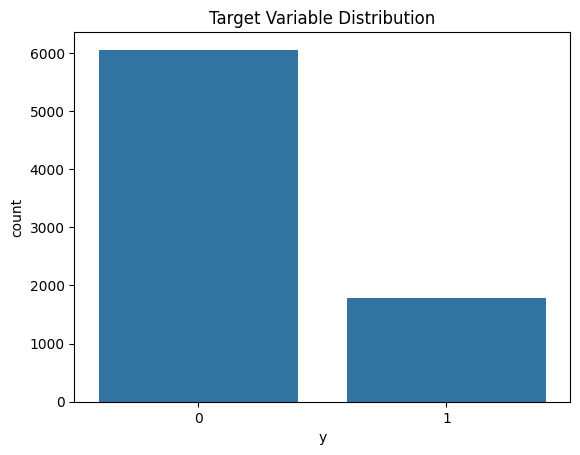

In [ ]:
# Target distribution
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

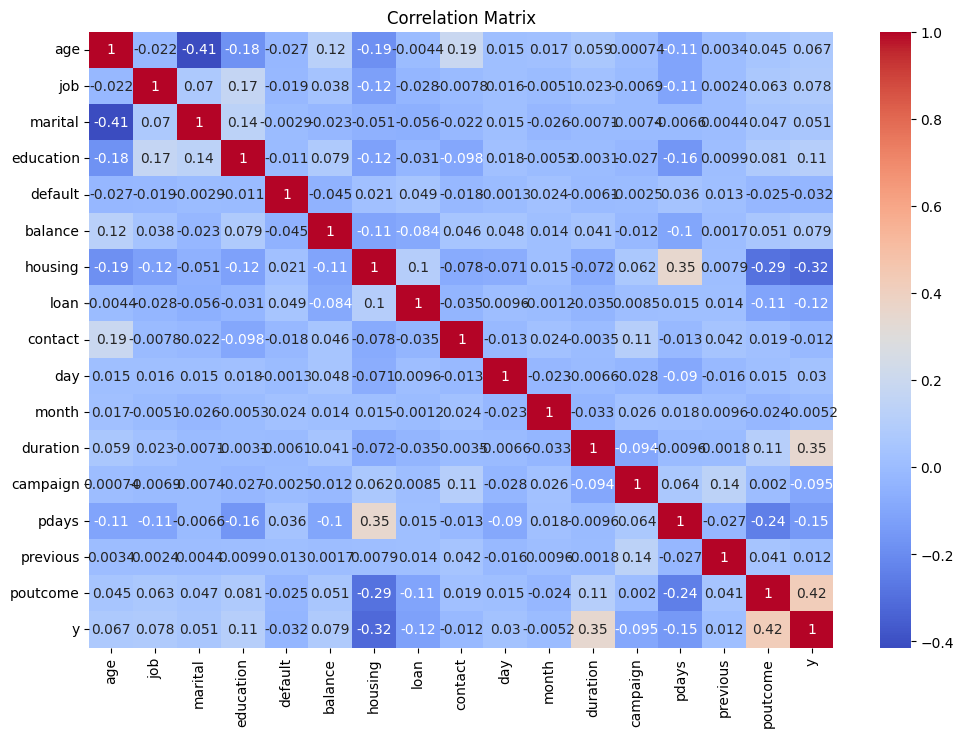

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

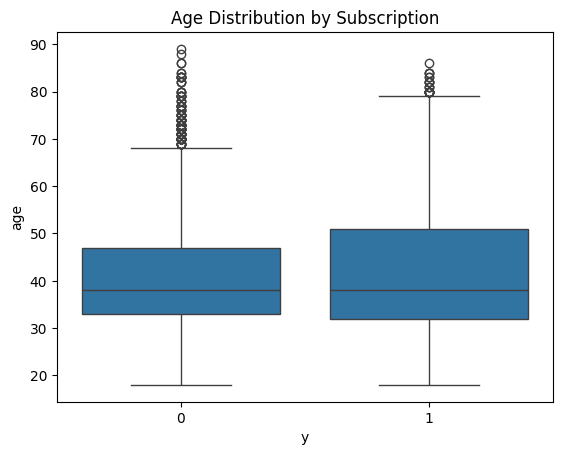

In [ ]:
# Age distribution by target
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution by Subscription')
plt.show()

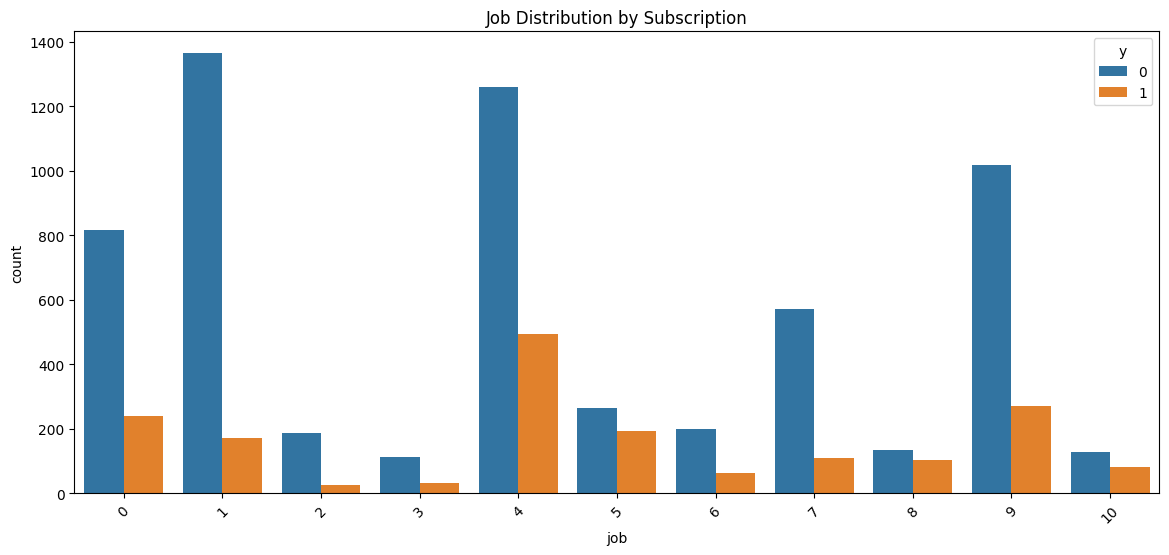

In [ ]:
# Job vs Subscription
plt.figure(figsize=(14,6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Job Distribution by Subscription')
plt.xticks(rotation=45)
plt.show()

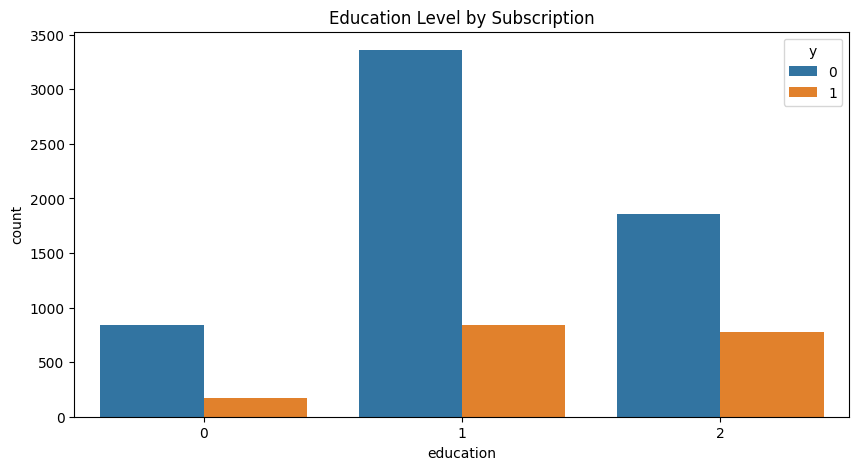

In [ ]:
# Education vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df)
plt.title('Education Level by Subscription')
plt.show()

## Train/Test Split

In [ ]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Model Evaluation

In [ ]:
y_pred = dt_model.predict(X_test)
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix: [[1673  138]
 [ 245  297]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.92      0.90      1811
           1       0.68      0.55      0.61       542

    accuracy                           0.84      2353
   macro avg       0.78      0.74      0.75      2353
weighted avg       0.83      0.84      0.83      2353

Accuracy Score: 0.8372290692732681


## Visualize the Decision Tree

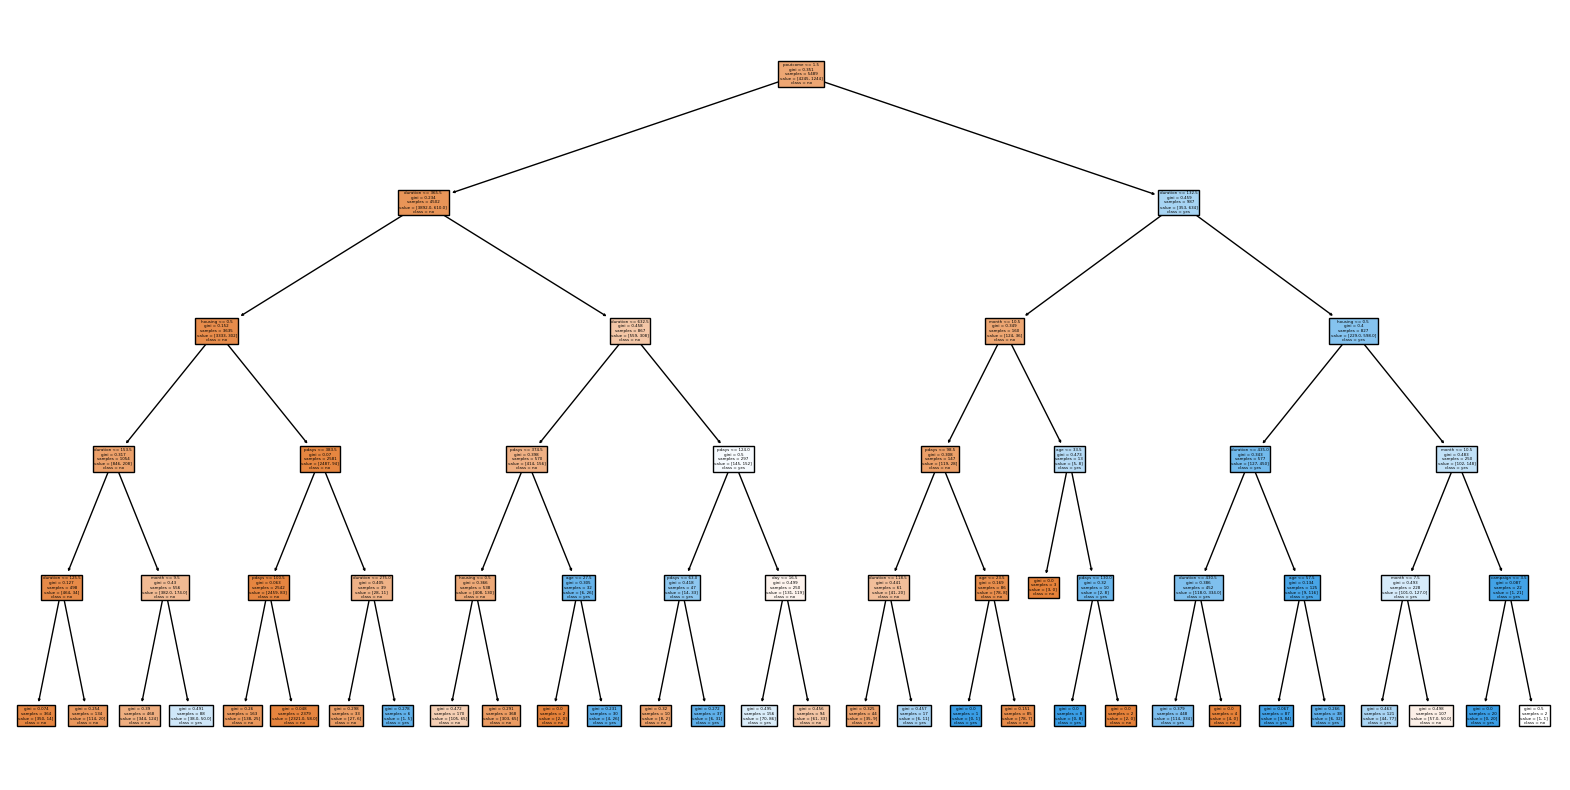

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()